In [5]:
import numpy as np
from IPython.display import display

from Data import Data

data = Data()
samples = data.getSamples()
targets = data.getTargets()

minimum = np.array(samples, dtype=np.float64).min(axis=0).min(axis=0)
maximum = np.array(samples, dtype=np.float64).max(axis=0).max(axis=0)
print("Maximum: " + str(maximum))
print("Minimum: " + str(minimum))

Maximum: 54077760.0
Minimum: 0.0


In [111]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import pandas as pd
import matplotlib.pyplot as plt

targetsGroup = []
for target in targets:
    if target not in targetsGroup:
        targetsGroup.append(target)

groupedSamples = [[] for i in range(len(targetsGroup))]
means = []
for i in range(len(targetsGroup)):
    for j in range(len(samples)):
        if targets[j] == i + 1:
            groupedSamples[i].append(np.array(samples[j]))
    groupedSamples[i] = np.array(groupedSamples[i])

for group in groupedSamples:
    group2 = np.array(group, dtype=np.float64)
    mean = []
    for i in range(group2.shape[1]):
        a = group2[:, i - 1]
        a = a.mean()
        mean.append(a)
    means.append(mean)

dataFrame = pd.DataFrame(means)

usersRangeWidget = widgets.IntRangeSlider(
    value=[1, 6],
    min=min(targetsGroup),
    max=max(targetsGroup),
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
usersRangeWidget.layout.width = '100%'

@interact(x=usersRangeWidget)
def updatePlots(x):
    meansPlot = dataFrame.iloc[x[0]:x[1]].T
    meansPlot.plot(legend=False).set_ylim(dataFrame.min(axis=0).min(axis=0), dataFrame.max(axis=0).max(axis=0))

interactive(children=(IntRangeSlider(value=(1, 6), continuous_update=False, description='Test:', layout=Layout…

In [8]:
usersDDWidget = widgets.Dropdown(
    options=targetsGroup,
    value=1,
    description='User:',
    disabled=False,
)

@interact(x=usersDDWidget)
def plotUserData(x):
    usersSamples = pd.DataFrame(groupedSamples[x])
    usersSamples.astype(float).T.plot(legend=False).set_ylim(minimum, maximum)


interactive(children=(Dropdown(description='User:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…

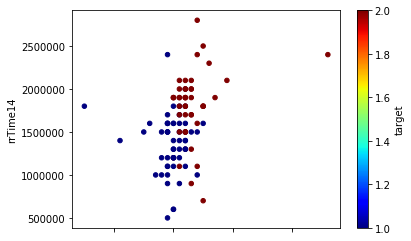

In [162]:
test = pd.DataFrame(np.concatenate((samples[:], targets[:, None]), axis=1),
                    columns=np.append(data.getHeaders(), "target"))
test.loc[(test["target"]==1) | (test["target"]==3)].plot(kind="scatter", x="rrTime0", y="rrTime14", c="target", colormap='jet')